In [2]:
import pyvista as pv
import numpy as np 
import os
import pickle
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt 
from scipy.spatial import distance
from utils.file_manip.Matlab_to_array import load_faces, load_vertices
import pyvista as pv 
from utils.cortical import surface_preprocess as sp
from utils.cortical import spherical_harmonics as SH
from utils.file_manip.Matlab_to_array import load_faces, load_vertices

In [16]:
#Paramaters
lmax = 50
sigma=1e-7
lambda_reg=1e-6
pre_computed_folder=r"C:\Users\wbou2\Desktop\meg_to_surface_ml\src\data"

In [12]:
#Utils 
def register(surface, output_file):
    coords, tris = surface
    if not output_file.endswith(".npz"):
        output_file+=".npz"
    np.savez(output_file, coords=coords, tris=tris)


In [17]:
template_projection = pickle.load(open(r"C:\Users\wbou2\Desktop\meg_to_surface_ml\src\data\spherical_template.pkl", 'rb'))
Y=np.load(r"C:\Users\wbou2\Desktop\meg_to_surface_ml\src\data\Y_120.npz")['Y']
Y_lh=Y[:,:(lmax+1)**2]

In [ ]:
#Y = SH.compute_Y(template_projection['theta'], template_projection['phi'], lmax=120)
# Y_file=os.path.join(pre_computed_folder,"Y.npz")
# np.savez(Y_file, Y=Y)

In [ ]:
main_folder = r"C:\Users\wbou2\Desktop\meg_to_surface_ml\data\Anatomy_data_CAM_CAN"

for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(folder_path):
        print(f"Processing subject: {folder}")
        try:
            left_vertices_file = os.path.join(folder_path, "lh_vertices.mat")
            left_faces_file = os.path.join(folder_path, "lh_faces.mat")
            output_file = os.path.join(folder_path, "lh_resampled.npz")
            if "lh_resampled.npz" not in os.listdir(folder_path):
                left_faces = load_faces(left_faces_file)
                left_vertices = load_vertices(left_vertices_file)
                resampled_surface = sp._inner_surface((left_vertices, left_faces), 'lh')
                # Centrage des coords après le resampling
                resampled_surface[0] -= np.mean(resampled_surface[0], axis=0)
                register(resampled_surface, output_file)
                print(f"  Left hemisphere processed successfully")
            else:
                data = np.load(output_file)
                coords = data['coords']
                tris = data['tris']
                coords -= np.mean(coords, axis=0)
                np.savez(output_file, coords=coords, tris=tris)
                print(f"  Left hemisphere centered successfully")
            
        except Exception as e:
            print(f"  Error processing left hemisphere: {str(e)}")
        
        try:
            right_vertices_file = os.path.join(folder_path, "rh_vertices.mat")
            right_faces_file = os.path.join(folder_path, "rh_faces.mat")
            output_file = os.path.join(folder_path, "rh_resampled.npz")
            if "rh_resampled.npz" not in os.listdir(folder_path):
                right_faces = load_faces(right_faces_file)
                right_vertices = load_vertices(right_vertices_file)
                resampled_surface = sp.get_resampled_inner_surface((right_vertices, right_faces), 'rh')
                # Centrage des coords après le resampling
                resampled_surface[0] -= np.mean(resampled_surface[0], axis=0)
                register(resampled_surface, output_file)
                print(f"  Right hemisphere processed successfully")
            else:
                data = np.load(output_file)
                coords = data['coords']
                tris = data['tris']
                coords -= np.mean(coords, axis=0)
                np.savez(output_file, coords=coords, tris=tris)
                print(f"  Right hemisphere centered successfully")
            
        except Exception as e:
            print(f"  Error processing right hemisphere: {str(e)}")



Processing subject: sub-CC110033
Processing subject: sub-CC710494
Processing subject: sub-CC710548
Processing subject: sub-CC710551
Processing subject: sub-CC710566
Processing subject: sub-CC710591
Processing subject: sub-CC710664
Processing subject: sub-CC710679
Processing subject: sub-CC710982
Processing subject: sub-CC711035
Processing subject: sub-CC711128
Processing subject: sub-CC711158
Processing subject: sub-CC711245
Processing subject: sub-CC712027
Processing subject: sub-CC720023
Processing subject: sub-CC720071
Processing subject: sub-CC720103
Processing subject: sub-CC720188
Processing subject: sub-CC720238
Processing subject: sub-CC720290
Processing subject: sub-CC720304
Processing subject: sub-CC720329
Processing subject: sub-CC720358
Processing subject: sub-CC720400
Processing subject: sub-CC720407
Processing subject: sub-CC720511
Processing subject: sub-CC720516
Processing subject: sub-CC720622
Processing subject: sub-CC720646
Processing subject: sub-CC720670
Processing

In [15]:
main_folder = r"C:\Users\wbou2\Desktop\meg_to_surface_ml\data\Anatomy_data_CAM_CAN"

for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(folder_path):
        coeffs_lh_path = os.path.join(folder_path, "coeffs_lh.pkl")
        coeffs_rh_path = os.path.join(folder_path, "coeffs_rh.pkl")
        
        # Traitement hémisphère gauche
        if not os.path.exists(coeffs_lh_path):
            print(f"Processing left hemi of {folder}")
            left_resampled_file = os.path.join(folder_path, "lh_resampled.npz")
            coeffs_lh = sp.compute_coefficients(Y_lh, template_projection['sphere_coords'], 
                                        resampled_surface, lmax, lambda_reg)
            with open(coeffs_lh_path, 'wb') as f:
                pickle.dump(coeffs_lh, f)
        
        # Traitement hémisphère droit
        if not os.path.exists(coeffs_rh_path):
            print(f"Processing right hemi of {folder}")
            right_resampled_file = os.path.join(folder_path, "rh_resampled.npz")
            coeffs_rh = sp.compute_coefficients(Y_rh, template_projection['sphere_coords'], 
                                        resampled_surface, lmax, lambda_reg)
            with open(coeffs_rh_path, 'wb') as f:
                pickle.dump(coeffs_rh, f)




Processing right hemi of sub-CC721374
Processing left hemi of sub-CC721377
Processing right hemi of sub-CC721377
Processing left hemi of sub-CC721392
Processing right hemi of sub-CC721392
Processing left hemi of sub-CC721434
Processing right hemi of sub-CC721434
Processing left hemi of sub-CC721504
Processing right hemi of sub-CC721504
Processing left hemi of sub-CC721519
Processing right hemi of sub-CC721519
Processing left hemi of sub-CC721532
Processing right hemi of sub-CC721532
Processing left hemi of sub-CC721585
Processing right hemi of sub-CC721585
Processing left hemi of sub-CC721648
Processing right hemi of sub-CC721648
Processing left hemi of sub-CC721707
Processing right hemi of sub-CC721707
Processing left hemi of sub-CC721729
Processing right hemi of sub-CC721729
Processing left hemi of sub-CC721891
Processing right hemi of sub-CC721891
Processing left hemi of sub-CC721894
Processing right hemi of sub-CC721894
Processing left hemi of sub-CC722536
Processing right hemi of 

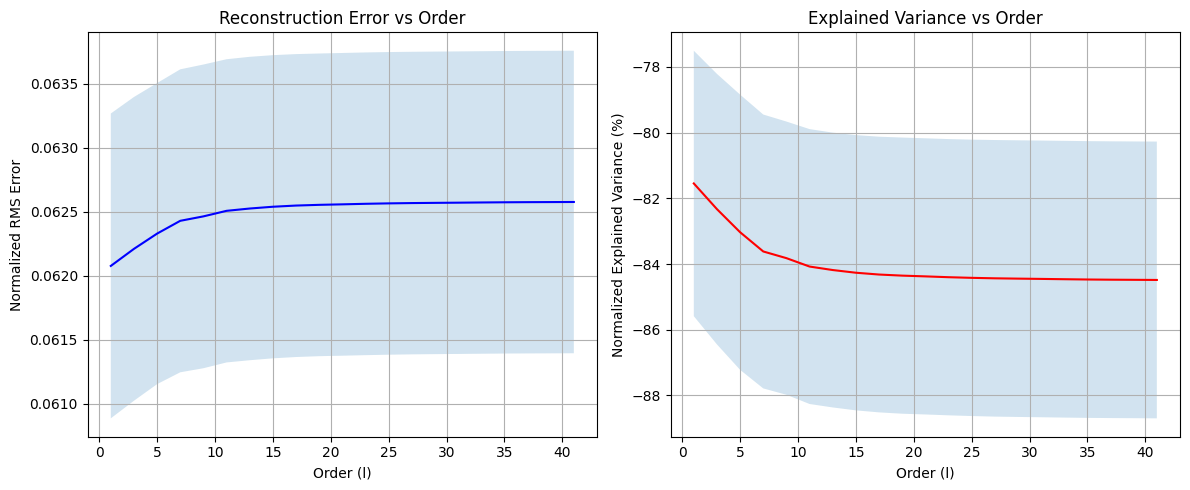

In [23]:
def analyze_reconstruction_error(coeffs, resampled_data, Y_lh, orders):
    errors = []
    variances_explained = []
    
    r_coords = resampled_data['coords']
    
    for l in orders:
        # Simple reconstruction
        reconstruction = SH.generate_surface(Y_lh, l, sigma, orders=coeffs['organized_coeffs'])
        
        # Erreur brute (distance euclidienne moyenne)
        error = np.sqrt(np.mean(np.sum((r_coords - reconstruction)**2, axis=1)))
        errors.append(error)
        
        # Pour la variance expliquée, on utilise les données brutes
        ss_res = np.sum((r_coords - reconstruction)**2)
        ss_tot = np.sum((r_coords - r_coords.mean(axis=0))**2)
        r_squared = 1 - (ss_res / ss_tot)
        variances_explained.append(r_squared)
        
    return errors, variances_explained

orders = range(1,42, 2)
all_errors = []
all_variances = []

for folder in os.listdir(main_folder)[:5]:
    folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(folder_path):
        with open(os.path.join(folder_path, "coeffs_lh.pkl"), 'rb') as f:
            coeffs = pickle.load(f)
        
        resampled_data = np.load(os.path.join(folder_path, "lh_resampled.npz"))
        errors, variances = analyze_reconstruction_error(coeffs, resampled_data, Y_lh, orders)
        all_errors.append(errors)
        all_variances.append(variances)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(orders, np.mean(all_errors, axis=0), 'b-', label='Mean error')
plt.fill_between(orders, 
                np.mean(all_errors, axis=0) - np.std(all_errors, axis=0),
                np.mean(all_errors, axis=0) + np.std(all_errors, axis=0),
                alpha=0.2)
plt.xlabel('Order (l)')
plt.ylabel('Normalized RMS Error')
plt.title('Reconstruction Error vs Order')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(orders, np.mean(all_variances, axis=0) * 100, 'r-', 
         label='Mean explained variance')
plt.fill_between(orders,
                np.mean(all_variances, axis=0) * 100 - np.std(all_variances, axis=0) * 100,
                np.mean(all_variances, axis=0) * 100 + np.std(all_variances, axis=0) * 100,
                alpha=0.2)
plt.xlabel('Order (l)')
plt.ylabel('Normalized Explained Variance (%)')
plt.title('Explained Variance vs Order')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def change_representations(coeffs):
    lmax=coeffs["lmax"]
    org_coeffs=coeffs['organized_coeffs']
    a={}
    b={}
    for l in range(lmax+1):
        a[l]=[coeffs[l][l].real()]
        b[l]=[coeffs[l][l].imag()]
        for m in range(0,l):
            a[l].append(coeffs[l][m].real()+coeffs[l][2*l-m].real())
            b[l].append(coeffs[l][m].imag()+coeffs[l][2*l-m].imag())
    return a,b  

In [4]:
#Analysis 

def spectral_power(a,b,l):
    return np.sum(a[l]**2+b[l]**2)

In [ ]:
a=np.array([[1,2]], dtype=np.float64)
b=np.array([[2,3]], dtype=np.float64)

18

In [5]:
brain_file=r'C:\Users\wbou2\Desktop\meg_to_surface_ml\data\Anatomy_data_CAM_CAN\sub-CC710982\lh_resampled.npz'

In [7]:
resampled_surface = np.load(r"C:\Users\wbou2\Desktop\meg_to_surface_ml\data\Anatomy_data_CAM_CAN\sub-CC712027\lh_resampled.npz")
r_coords, r_tris = resampled_surface["coords"], resampled_surface["tris"]